# Understanding The Distributions of Variables In BdNMC

### Use units of MeV!

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad




## $E_e(\theta)$

In [70]:
def Ee_theta(theta, Ex, mx):
    me = 0.511 # MeV
    num = me * ((Ex + me)*(Ex+me)+(Ex**2 - mx**2)*np.cos(theta)**2)
    den = ((Ex + me)**2 - (Ex**2 - mx**2)*np.cos(theta)**2)
    return num / den

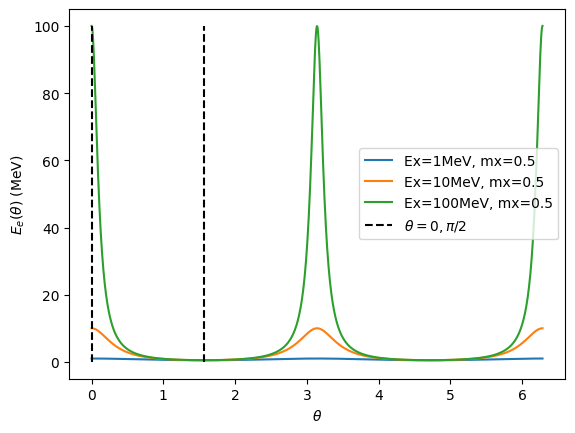

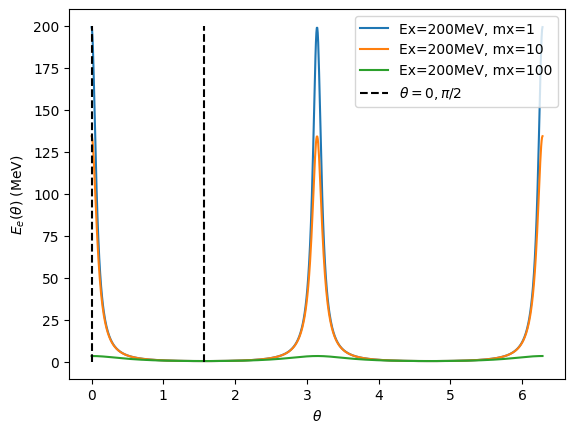

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
theta = np.linspace(0, 2*np.pi, 1000)
ax.plot(theta, Ee_theta(theta, 1, 0.5), label='Ex=1MeV, mx=0.5')
ax.plot(theta, Ee_theta(theta, 10, 0.5), label='Ex=10MeV, mx=0.5')
ax.plot(theta, Ee_theta(theta, 100, 0.5), label='Ex=100MeV, mx=0.5')
ax.vlines([0.0, np.pi/2.0], 0, 100, colors="k", label=r'$\theta=0, \pi/2$', linestyles='dashed')
ax.set(xlabel=r'$\theta$', ylabel=r'$E_e(\theta)$ (MeV)')
ax.legend()
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(theta, Ee_theta(theta, 200, 1), label='Ex=200MeV, mx=1')
ax2.plot(theta, Ee_theta(theta, 200, 10), label='Ex=200MeV, mx=10')
ax2.plot(theta, Ee_theta(theta, 200, 100), label='Ex=200MeV, mx=100')
ax2.vlines([0.0, np.pi/2.0], 0, 200, colors="k", label=r'$\theta=0, \pi/2$', linestyles='dashed')
ax2.set(xlabel=r'$\theta$', ylabel=r'$E_e(\theta)$ (MeV)')
ax2.legend()
plt.show()

## $\frac{d\sigma}{dE_e}$

In [72]:
kappa = 1e-3
alphaEM = 1/137
alphaD = 0.1
Me = 0.511

def dsigma_dE_fermionic(EDM, Ee, MDM, MDP):
    coef = 4 * np.pi * kappa * kappa * alphaEM * alphaD
    Nominator = (EDM * EDM * Me + EDM * (EDM * Me + 2 * Me * (-Ee + Me)) + (Ee - Me) * ((Ee - 2 * Me) * Me - MDP * MDP))
    Denominator = (((MDP * MDP + 2 * (Ee - Me) * Me)**2) * (EDM * EDM - MDM * MDM))
    ratio = Nominator / Denominator
    return coef * ratio

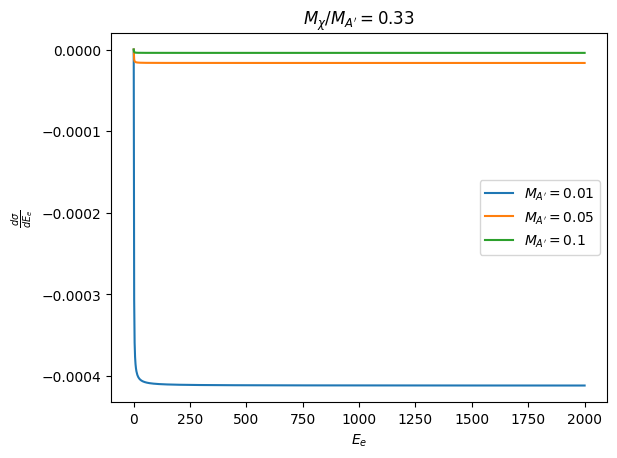

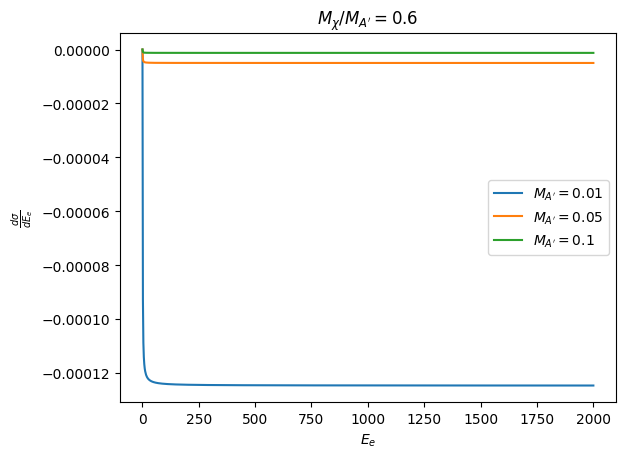

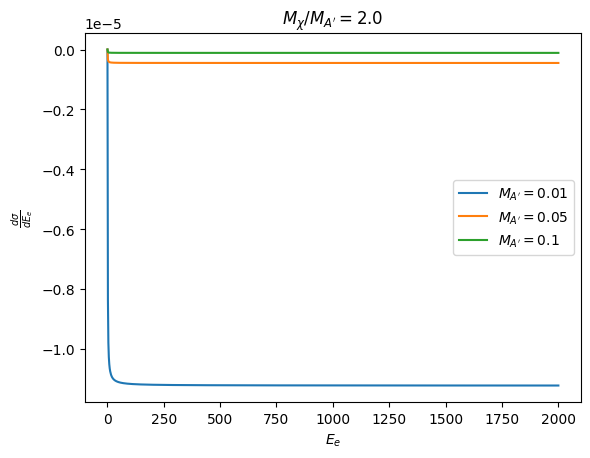

In [73]:

Ee = np.linspace(0.511, 2000, 1000)
EDM = np.linspace(0., 20, 5)

dts = [0.33, 0.6, 2.0]
MAs = [0.01, 0.05, 0.1]
for dt in dts:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for MA in MAs:
        mchi = dt * MA
        ax.plot(Ee, dsigma_dE_fermionic(float(EDM[0]), Ee, mchi, MA), label=r"$M_{A'}=$"+f'{MA}')
        ax.set(xlabel=r'$E_e$', ylabel=r'$\frac{d\sigma}{dE_e}$', title=r"$M_\chi / M_{A'}=$"+f'{dt}')
        ax.legend()
    #ax.loglog()
plt.show()


## $\sigma(Ee)$

In [74]:
def sigma_fermionic(Ee, EDM, MDM, MDP):
    Me = 0.511 # MeV
    # note there is a + C determined by the boundary conditions
    # usually do F2(E_Max) - F2(E_Min)
    denominator = -2.0 * Me*Me * ((EDM*EDM)-(MDM*MDM))
		
    t1 = (-2.0 * Ee * Me)
    t2 = ( (MDP*MDP*MDP*MDP)+ (8.*EDM*EDM*Me*Me) + (2.*MDP*MDP*((2.*EDM*Me) + (Me*Me) + (MDM*MDM))) ) / ((MDP*MDP) + (2. * (Ee-Me) * Me))
    t3 = 2.* ((MDP*MDP) + (2.*EDM*Me) + (Me*Me) + (MDM*MDM)) * np.log((MDP*MDP) + (2.*(Ee-Me)*Me))

    return 18.0 * alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator

/tmp/ipykernel_47951/212304644.py:11: RuntimeWarning: divide by zero encountered in divide
  return 18.0 * alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator


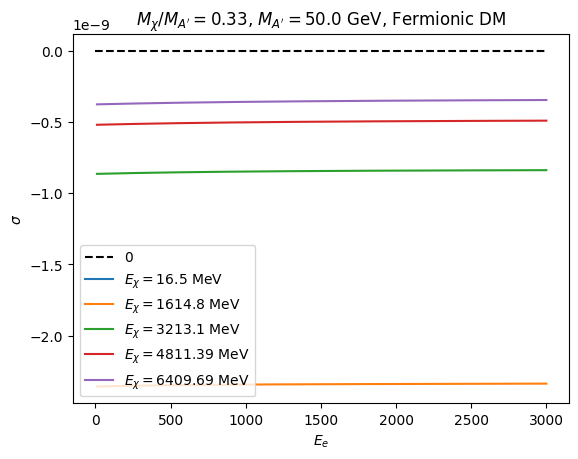

In [75]:
dt = 0.33
MA = 0.05*1000 # MeV
mchi = dt * MA

Ee = np.linspace(10, 3000, 100000) # 0.01 GeV to 3 GeV is typical for e- at this dt / MA
EDM = np.linspace(mchi, 8000, 1000) # mchi to 8 GeV is typical for 0.33, eta, 0.05 MA


# fixed MA and DT
# vary EMD
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hlines(0, 0, 3000, colors="k", linestyles="--", label='0')
for Echi in EDM[::200]:
    ax.plot(Ee, sigma_fermionic(Ee, float(Echi), mchi, MA), label=r"$E_\chi=$"+f'{round(Echi,2)} MeV')
    ax.set(xlabel=r'$E_e$', ylabel=r'$\sigma$', title=r"$M_\chi / M_{A'}=$"+f'{dt}, '+r"$M_{A'}=$"+f'{MA} GeV, Fermionic DM')
    ax.legend()

## $\int_{E_{min}}^{E_{max}} \frac{d \sigma} {d E_e} dE_e = F_2(E_{max}) - F_2(E_{min})$
$$ E_{min} = E_e(\pi/2) \quad E_{max} = E_e(0) $$

/tmp/ipykernel_47951/212304644.py:11: RuntimeWarning: divide by zero encountered in divide
  return 18.0 * alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator
/tmp/ipykernel_47951/31450416.py:16: RuntimeWarning: invalid value encountered in subtract
  ans = sigma_fermionic(E_e_max, EDM, mchi, ma) - sigma_fermionic(E_e_min, EDM, mchi, ma)


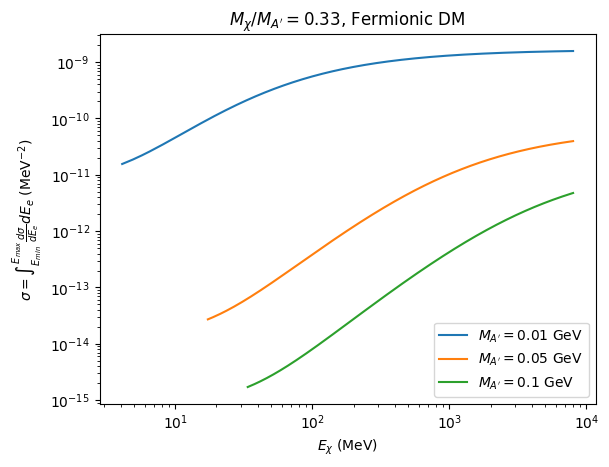

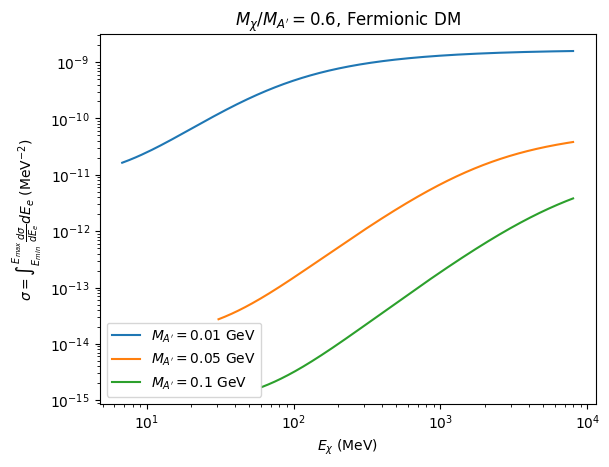

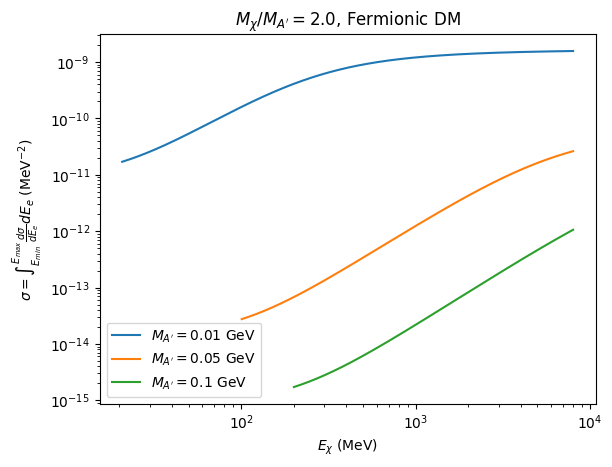

In [76]:
dts = [0.33, 0.6, 2.0]
MAs = [0.01*1000, 0.05*1000, 0.1*1000] # MeV



for dt in dts:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for ma in MAs:
        
        mchi = dt * ma
        EDM = np.linspace(mchi, 8000, 10000) # mchi to 8 GeV is typical for 0.33, eta, 0.05 MA
        E_e_min = Ee_theta(np.pi/2, EDM, mchi)
        E_e_max = Ee_theta(0, EDM, mchi)

        ans = sigma_fermionic(E_e_max, EDM, mchi, ma) - sigma_fermionic(E_e_min, EDM, mchi, ma)
        #print(E_e_min[-1], E_e_max[-1], ans)
        ax.plot(EDM, ans, label=r"$M_{A'}=$"+f'{ma/1000} GeV')
        #ax.vlines(mchi, 10e-9, 10e-15, colors="k", linestyles='dashed')
        #ax.vlines(ma, 10e-9, 10e-13, colors="r", linestyles='dashed')

    ax.set(xlabel=r'$E_\chi$ (MeV)', ylabel=r'$\sigma=\int_{E_{min}}^{E_{max}} \frac{d \sigma} {d E_e} dE_e$ (MeV$^{-2})$', title=r"$M_\chi / M_{A'}=$"+f'{dt}, Fermionic DM')
    ax.legend()
    ax.loglog()
    plt.savefig(f"../plots/distributions/sigma_fermionic_dt_{dt}.png")
    plt.show()


/tmp/ipykernel_47951/212304644.py:11: RuntimeWarning: divide by zero encountered in divide
  return 18.0 * alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator
/tmp/ipykernel_47951/4062246602.py:17: RuntimeWarning: invalid value encountered in subtract
  ans = 200**2 * (sigma_fermionic(E_e_max, EDM, mchi, ma) - sigma_fermionic(E_e_min, EDM, mchi, ma)) / (100*(10**15))


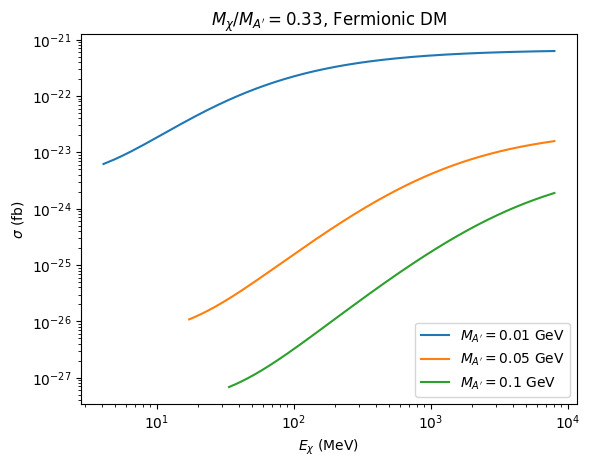

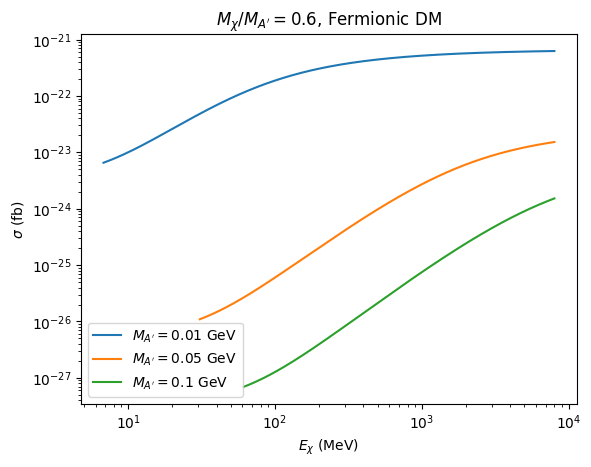

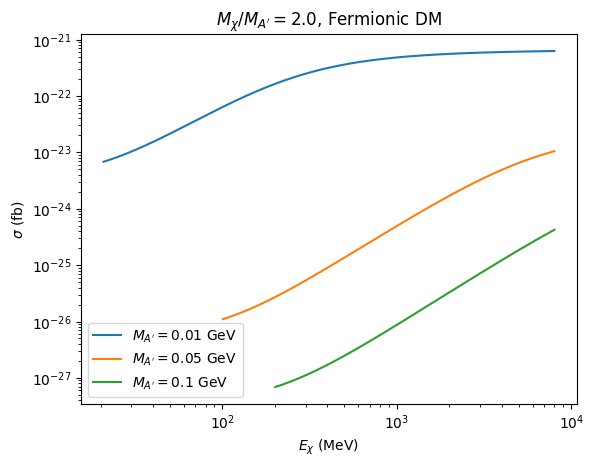

In [77]:
dts = [0.33, 0.6, 2.0]
MAs = [0.01*1000, 0.05*1000, 0.1*1000] # MeV

for dt in dts:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for ma in MAs:
        
        mchi = dt * ma
        EDM = np.linspace(mchi, 8000, 10000) # mchi to 8 GeV is typical for 0.33, eta, 0.05 MA
        E_e_min = Ee_theta(np.pi/2, EDM, mchi)
        E_e_max = Ee_theta(0, EDM, mchi)

        # hbar c = 200 MeV fm
        # 1 b = 100 fm^2
        # 1 fb = 100 * 10^-15 fm^2
        ans = 200**2 * (sigma_fermionic(E_e_max, EDM, mchi, ma) - sigma_fermionic(E_e_min, EDM, mchi, ma)) / (100*(10**15))
        #print(E_e_min[-1], E_e_max[-1], ans)
        ax.plot(EDM, ans, label=r"$M_{A'}=$"+f'{ma/1000} GeV')
        #ax.vlines(mchi, 10e-9, 10e-15, colors="k", linestyles='dashed')
        #ax.vlines(ma, 10e-9, 10e-13, colors="r", linestyles='dashed')

    ax.set(xlabel=r'$E_\chi$ (MeV)', ylabel=r'$\sigma$ (fb)', title=r"$M_\chi / M_{A'}=$"+f'{dt}, Fermionic DM')
    ax.legend()
    ax.loglog()
    plt.savefig(f"../plots/distributions/fb_sigma_fermionic_dt_{dt}.png")
    plt.show()

In [78]:
# lets say we have 5 MeV-2
print(5 * 200**2/ (100*(10**15)))
# hc = 0.389 GeV^2 mbarn
# 1 mbarn = 10^-3 barn
# 1 fb = 10^-15 barn
print(5 * 10**(3) * 10**(3) * 0.389  * 10**(12))
print(5 * 10**-3 * 2.56819*10**(-9) * 1000 * 1000)


2e-12
1.945e+18
1.2840950000000001e-05


In [79]:
def sigma_scalar(Ee, EDM, MDM, MDP):
    Me = 0.511 # MeV
    F2N1 = (4 * EDM * EDM * Me * Me + 2 * EDM * Me * MDP * MDP + MDP * MDP * MDM * MDM) / (2 * Ee * Me - 2 * Me * Me + MDP * MDP)
    F2N2 = (2 * EDM * Me + MDM * MDM) * np.log(2 * Ee * Me - 2 * Me * Me + MDP * MDP)
    F2D = 4 * Me * Me * (EDM * EDM - MDM * MDM)
    rF2 = -(F2N1 + F2N2) / F2D
    return 4 * np.pi * kappa * kappa * alphaEM * alphaD * rF2

/tmp/ipykernel_47951/3146130662.py:6: RuntimeWarning: divide by zero encountered in divide
  rF2 = -(F2N1 + F2N2) / F2D
/tmp/ipykernel_47951/202948942.py:16: RuntimeWarning: invalid value encountered in subtract
  ans = sigma_scalar(E_e_max, EDM, mchi, ma) - sigma_scalar(E_e_min, EDM, mchi, ma)


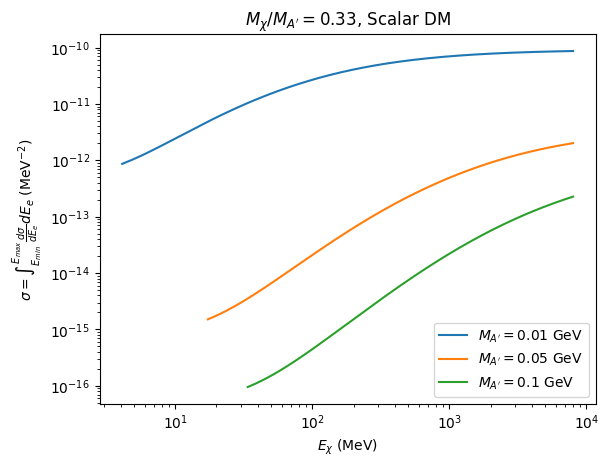

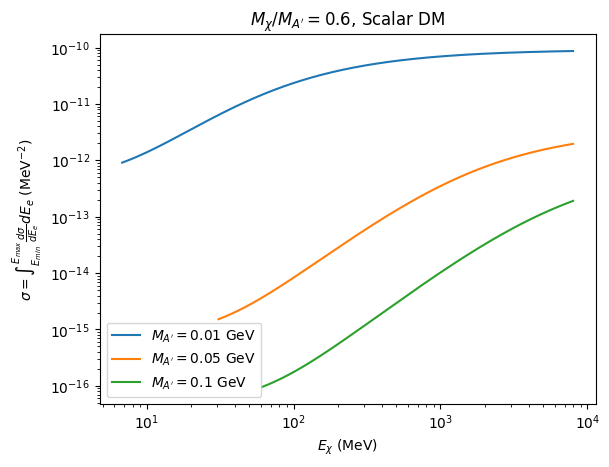

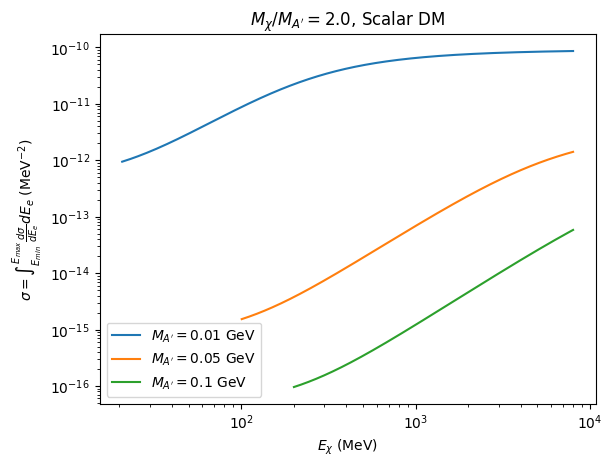

In [80]:
dts = [0.33, 0.6, 2.0]
MAs = [0.01*1000, 0.05*1000, 0.1*1000] # MeV



for dt in dts:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for ma in MAs:
        
        mchi = dt * ma
        EDM = np.linspace(mchi, 8000, 10000) # mchi to 8 GeV is typical for 0.33, eta, 0.05 MA
        E_e_min = Ee_theta(np.pi/2, EDM, mchi)
        E_e_max = Ee_theta(0, EDM, mchi)

        ans = sigma_scalar(E_e_max, EDM, mchi, ma) - sigma_scalar(E_e_min, EDM, mchi, ma)
        #print(E_e_min[-1], E_e_max[-1], ans)
        ax.plot(EDM, ans, label=r"$M_{A'}=$"+f'{ma/1000} GeV')
        #ax.vlines(mchi, 10e-9, 10e-15, colors="k", linestyles='dashed')
        #ax.vlines(ma, 10e-9, 10e-13, colors="r", linestyles='dashed')

    ax.set(xlabel=r'$E_\chi$ (MeV)', ylabel=r'$\sigma=\int_{E_{min}}^{E_{max}} \frac{d \sigma} {d E_e} dE_e$ (MeV$^{-2})$', title=r"$M_\chi / M_{A'}=$"+f'{dt}, Scalar DM')
    ax.legend()
    ax.loglog()
    plt.savefig(f"../plots/distributions/sigma_scalar_dt_{dt}.png")
    plt.show()
